<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/colab/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

In [ ]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 57 (delta 9), reused 54 (delta 9), pack-reused 0
Unpacking objects: 100% (57/57), done.


Plotting dataset Groundtruth


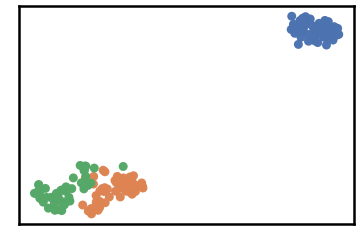

Plotting train data


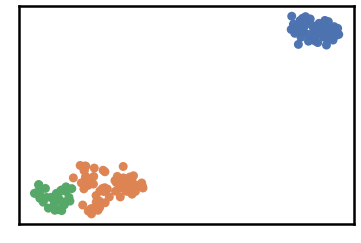

Validating train data
├── exec_time
│   ├── DenMune: 0.019
│   ├── NGT: 0.002
│   └── t_SNE: 0.85
├── n_clusters
│   ├── actual: 3
│   └── detected: 3
├── n_points
│   ├── dim: 4
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 0
│   ├── plot_size: 150
│   ├── size: 150
│   ├── strong: 84
│   └── weak
│       ├── all: 66
│       ├── failed to merge: 0
│       └── succeeded to merge: 66
└── validity
    └── train
        ├── ACC: 135
        ├── AMI: 0.795
        ├── ARI: 0.746
        ├── F1: 0.898
        ├── NMI: 0.798
        ├── completeness: 0.809
        └── homogeneity: 0.787



In [ ]:
data_path = 'datasets/denmune/uci/' 
dataset='iris' 
data_file = data_path + dataset + '.csv'

X_train = pd.read_csv(data_file, sep=',', header=None)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop(X_train.columns[-1], axis=1)  

knn = 11 # k-nearest neighbor, the only parameter required by the algorithm
dm = DenMune(train_data=X_train,
             train_truth=y_train,
             k_nearest=knn,
             rgn_tsne=False)

labels, validity = dm.fit_predict(show_noise=True, show_analyzer=True)
